<a href="https://colab.research.google.com/github/aashnadoshi2/Spotify-Hit-Predictor/blob/main/Spotify%20Hit%20Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Spotify Hit Predictor


## Preliminaries

Set the environment & manage imports

In [ ]:
!pip install -q umap-learn
!gdown 1YDEl9mA3Vr7zGZtkMeouexCNHhFaa_kn
!pip install scikit-learn==1.4.2

Downloading...
From: https://drive.google.com/uc?id=1YDEl9mA3Vr7zGZtkMeouexCNHhFaa_kn
To: /content/genre_music.csv
100% 5.62M/5.62M [00:00<00:00, 215MB/s]


In [ ]:
# imports
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition, cluster
from sklearn.preprocessing import MinMaxScaler
#import umap
import os

In [ ]:
# Create pandas dataframe
df = pd.read_csv("genre_music.csv")

# Summary statistics for numerical columns
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity
count,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000,41099.000000
mean,0.539683,0.579544,5.213752,-10.221446,0.693375,0.072952,0.364232,0.154403,0.201534,0.542450,119.336349,234.875505,3.893647,40.106896,10.475632,0.499964
std,0.177808,0.252629,3.535060,5.311227,0.461098,0.086106,0.338908,0.303518,0.172957,0.267333,29.099116,118.969563,0.423072,19.006697,4.872026,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,15.168000,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816500,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.395500,172.916500,4.000000,27.599510,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.559000,117.564000,217.907000,4.000000,35.850270,10.000000,0.000000
75%,0.669000,0.787000,8.000000,-6.375000,1.000000,0.069800,0.676000,0.061200,0.261000,0.768000,136.492000,266.773000,4.000000,47.627240,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4170.227000,5.000000,433.182000,169.000000,1.000000


# Data Exploration

genre
pop      16460
r&b      11040
rock      6850
latin     2870
rap       2364
edm       1515
Name: count, dtype: int64


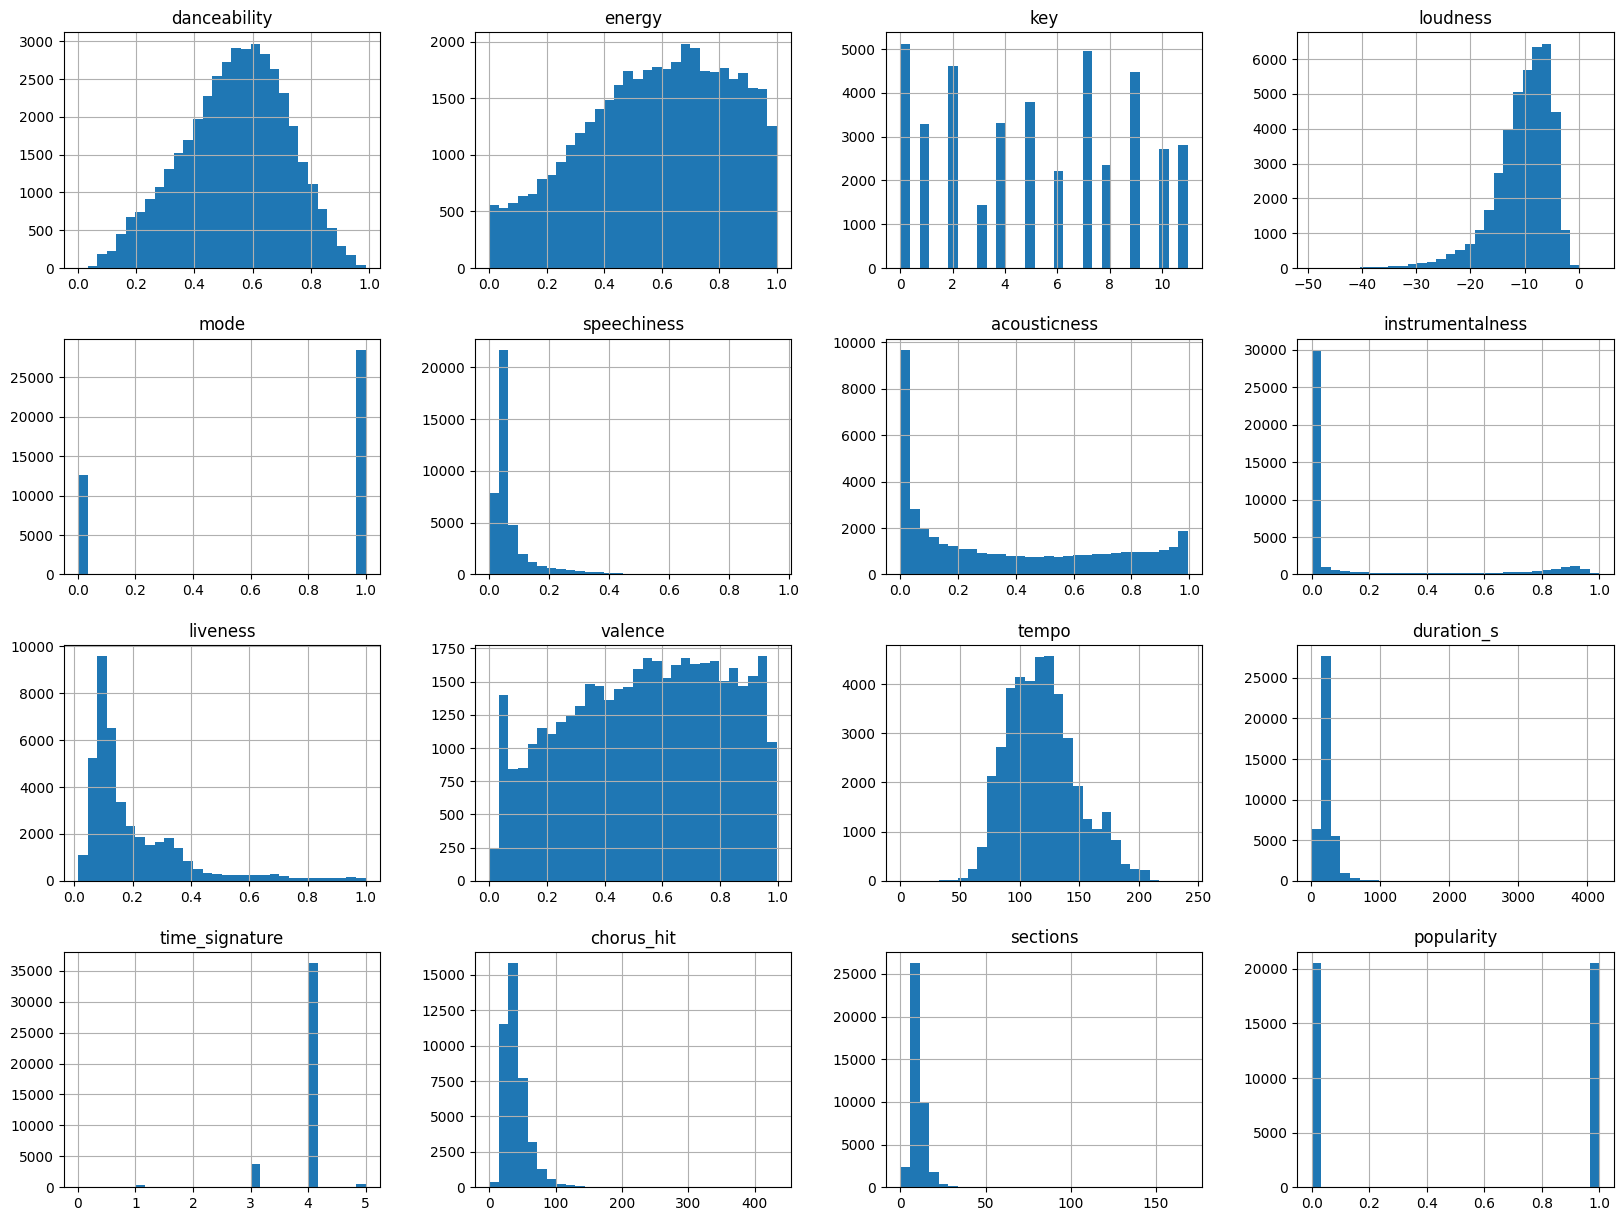

In [ ]:
# Check for missing values
# print(df.isnull().sum())

# Check the distribution of genres
print(df['genre'].value_counts())

# Visualize the distribution of numerical features
df.hist(bins=30, figsize=(20,15))
plt.show()

## Data Preprocessing

From the sample, genre, decade, artist, and track are **categorical** variables. We typically do not encode the artist and track fields since they are unique identifiers, but genre and decade could be useful for our analysis.

In [ ]:
# Count of duplicates
print("Dropped", len(df[df.duplicated(keep='first')]), "duplicate rows!")

# Drop duplicates:
df.drop_duplicates(inplace=True)

# Reset the index if needed
df = df.reset_index(drop=True)

# Finding unique genres
unique_genres = set(df['genre'])
print("Unique Genres: ", unique_genres)
print("Number of Unique Genres: ", len(unique_genres))

Dropped 220 duplicate rows!
Unique Genres:  {'latin', 'r&b', 'rap', 'edm', 'pop', 'rock'}
Number of Unique Genres:  6


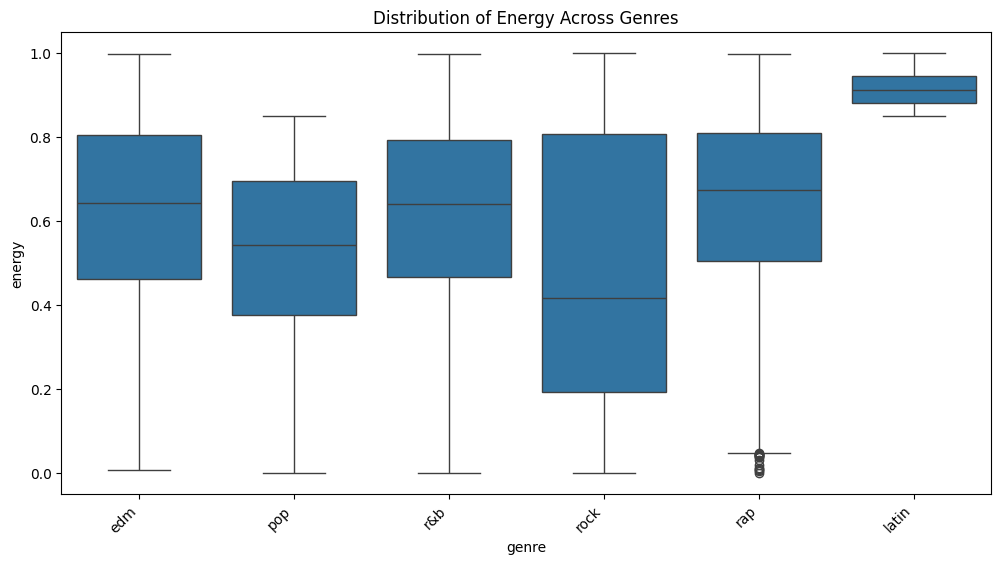

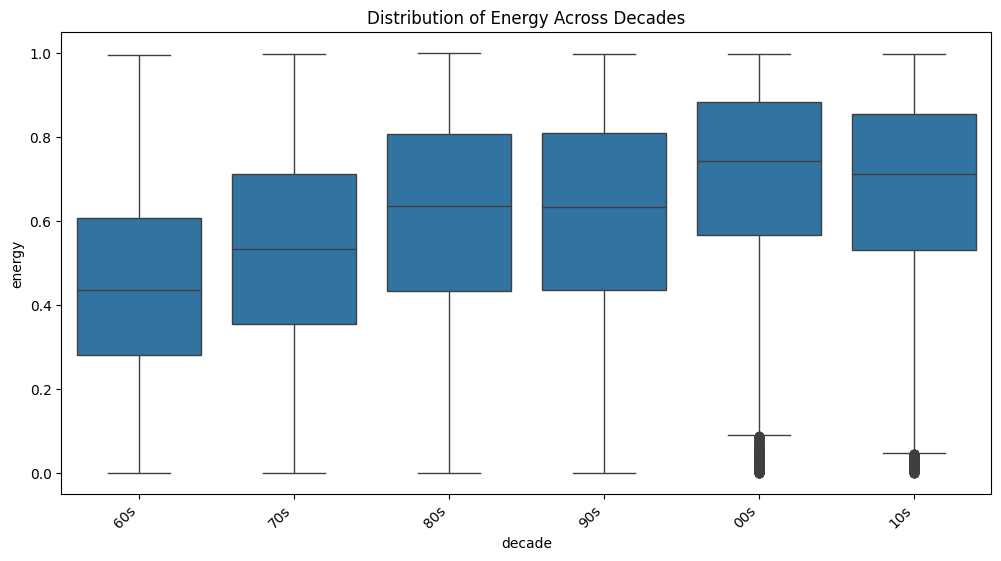

In [ ]:
import seaborn as sns

# Choose a numerical feature for the boxplot
# temp: energy
numerical_feature = 'energy'

# Boxplot for the distribution of a numerical feature across genres
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y=numerical_feature, data=df)
plt.title(f'Distribution of {numerical_feature.capitalize()} Across Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

# Boxplot for the distribution of a numerical feature across decades
plt.figure(figsize=(12, 6))
sns.boxplot(x='decade', y=numerical_feature, data=df)
plt.title(f'Distribution of {numerical_feature.capitalize()} Across Decades')
plt.xticks(rotation=45, ha='right')
plt.show()

genre
pop      16422
r&b      10969
rock      6787
latin     2848
rap       2351
edm       1502
Name: count, dtype: int64
Genre Counts:  {'edm': 1502, 'pop': 16422, 'r&b': 10969, 'rock': 6787, 'rap': 2351, 'latin': 2848}


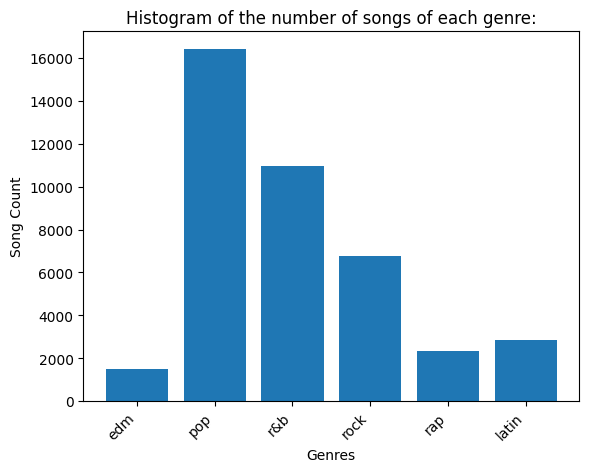

In [ ]:
# Genre Distribution

# Check the distribution of genres after preprocessing
print(df['genre'].value_counts())

from collections import Counter

# Count occurrences of each genre
genre_counts = dict(Counter(df['genre']))
print("Genre Counts: ", genre_counts)

# Create histogram
plt.bar(genre_counts.keys(), genre_counts.values())

# Label axes and add a title
plt.xlabel('Genres')
plt.ylabel('Song Count')
plt.title('Histogram of the number of songs of each genre:')

# Adjust appearance of x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

decade
60s    8621
70s    7721
80s    6889
10s    6286
00s    5856
90s    5506
Name: count, dtype: int64
Decade Counts:  {'60s': 8621, '70s': 7721, '80s': 6889, '90s': 5506, '00s': 5856, '10s': 6286}


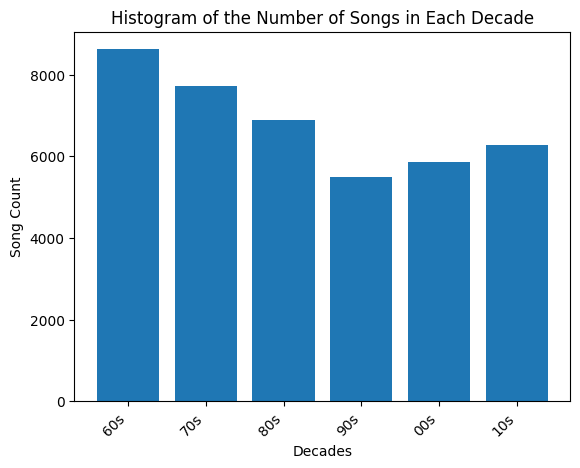

In [ ]:
# Decade Distribution

# Check distribution of decades after preprocessing
print(df['decade'].value_counts())

# Count occurrences of each decade
decade_counts = dict(Counter(df['decade']))
print("Decade Counts: ", decade_counts)

# Create histogram
plt.bar(decade_counts.keys(), decade_counts.values())

# Label axes and add a title
plt.xlabel('Decades')
plt.ylabel('Song Count')
plt.title('Histogram of the Number of Songs in Each Decade')

# Adjust appearance of x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
df
df.to_csv("genre_updated_names.csv")


In [ ]:
try:
  df = df.drop(['track','artist','duration_s'], axis=1)
except:
  pass
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,popularity,decade,genre
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,3,32.94975,9,1,60s,edm
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,4,48.82510,10,0,60s,pop
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,4,37.22663,12,0,60s,pop
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,4,24.75484,8,0,60s,pop
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,4,21.79874,14,0,60s,r&b


In [ ]:
df
df.to_csv("genre_updated.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
#scaler = StandardScaler()

# Assuming you want to scale all numerical columns except the last three, which are ('genre', 'decade', and 'popularity')
df_to_scale = df.iloc[:,:-3]

# Selecting only numerical columns for scaling
# df_numeric = df_to_scale.select_dtypes(include=[np.number])

# Scale the numerical data
#scaled_array = scaler.fit_transform(df_numeric.values)

# Convert the scaled data back to a DataFrame
#df_processed = pd.DataFrame(scaled_array, columns=df_numeric.columns)
df_processed = df_to_scale

# Adding the 'genre' column back to the processed DataFrame
df_processed['genre'] = df['genre']
df_processed['popularity'] = df['popularity']

# Display the first few rows of the processed DataFrame
df_processed.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,genre,popularity
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,3,32.94975,9,edm,1
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,4,48.82510,10,pop,0
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,4,37.22663,12,pop,0
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,4,24.75484,8,pop,0
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,4,21.79874,14,r&b,0


In [ ]:
# import joblib
# joblib.dump(scaler, "standard_scaler.joblib")

In [ ]:
expanded_df = df_processed.explode('genre')

# Calculate the mean values for each genre
# Assuming all columns except 'genre' are numerical and we want to include them in the pivot table
numerical_columns = [col for col in expanded_df.columns if col != 'genre']
df_genre_means = pd.pivot_table(expanded_df, index='genre', values=numerical_columns, aggfunc='mean').reset_index()

# Printing the means
print("Mean values of each feature for every genre in the dataframe.\n".center(150, " "))
df_genre_means

                                            Mean values of each feature for every genre in the dataframe.
                                            


,genre,acousticness,chorus_hit,danceability,energy,instrumentalness,key,liveness,loudness,mode,popularity,sections,speechiness,tempo,time_signature,valence
0,edm,0.322934,37.217801,0.495014,0.622582,0.107926,5.131824,0.181120,-9.102571,0.723702,0.541278,10.632490,0.072224,181.637314,3.842876,0.626177
1,latin,0.107337,39.587527,0.573217,0.914421,0.102924,5.323034,0.233538,-5.450718,0.693469,0.549860,8.694171,0.069957,122.887099,3.978581,0.646936
2,pop,0.433701,38.789692,0.595683,0.525072,0.107608,5.118073,0.188334,-10.443460,0.743637,0.572586,8.633175,0.051469,114.738754,3.904092,0.624043
3,r&b,0.272206,41.495814,0.604209,0.617907,0.143784,5.306591,0.191862,-9.746229,0.644453,0.554016,13.186161,0.055740,116.051377,3.942292,0.548165
4,rap,0.287941,40.541040,0.651338,0.640910,0.048910,5.471714,0.257601,-8.884154,0.606976,0.544449,10.510846,0.353022,120.722929,3.936623,0.555828
5,rock,0.489141,41.686842,0.258813,0.477727,0.347559,5.160896,0.220798,-13.122303,0.676440,0.207603,11.201120,0.056624,119.989464,3.750553,0.273927


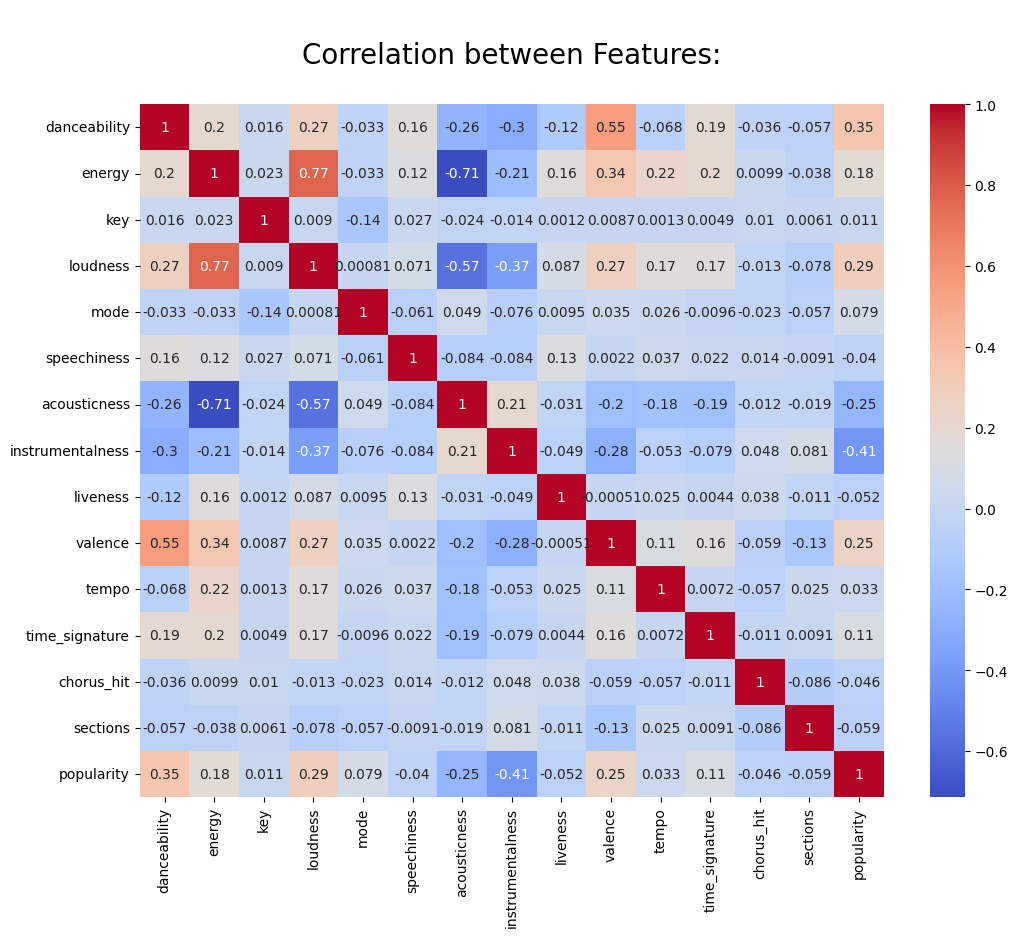

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df_processed[numerical_columns].corr()

# Generate a heatmap in seaborn
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)

# Title for the heatmap
plt.title('\nCorrelation between Features:\n', fontsize=20)

# Display the heatmap
plt.show()


In [ ]:
# Prints out highly correlated features
thresholds = [0.8, 0.6, 0.4]  # Adjust the threshold as needed

# Took upper triangular part of the correlation matrix
upper_triangular = np.triu(corr_mat, k=1)

# Highly correlated feature pairs
for threshold in thresholds:
  high_corr_pairs = [(corr_mat.columns[i], corr_mat.columns[j]) for i in range(upper_triangular.shape[0]) \
                     for j in range(i+1, upper_triangular.shape[1]) if abs(upper_triangular[i, j]) > threshold]

  print(threshold, high_corr_pairs)

0.8 []
0.6 [('energy', 'loudness'), ('energy', 'acousticness')]
0.4 [('danceability', 'valence'), ('energy', 'loudness'), ('energy', 'acousticness'), ('loudness', 'acousticness'), ('instrumentalness', 'popularity')]



### Reflections

Moderate correlation at 0.6: **energy** correlates w/ **loudness** and acousticness, which also makes sense intuitively.


The correlation doesn't seem to be high between features and so we will move forward with all the features.

### Splitting Data

We will now split the data into the training (80%) and the test set (20%). We will use the **genre** column class labels to classify the songs.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import pandas as pd

# The target variable ('y') is the last column, and the rest are feature columns ('X')

X = df_processed.iloc[:,:-2]  # Features: All columns except the last two
y = df_processed.iloc[:,-1]   # Target: The last column

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Initialize the RobustScaler
scaler = RobustScaler()

# This avoids data leakage from the test set into the model training process
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

cols = X.columns
x_train_scaled = pd.DataFrame(x_train_scaled, columns=cols)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=cols)

# Display the summary statistics of the scaled training data to check the scaling
x_train_scaled.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections
count,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000
mean,-0.049483,-0.053067,0.035613,-0.146657,-0.307801,0.822599,0.166546,2.767548,0.417553,-0.034852,0.044940,-0.106596,0.210115,0.117826
std,0.713682,0.646991,0.589219,0.820943,0.461591,2.415520,0.533790,5.503943,1.036122,0.608459,0.745907,0.424554,0.941120,1.201129
min,-2.229839,-1.541771,-0.833333,-6.219491,-1.000000,-1.212291,-0.407583,-0.002029,-0.703415,-1.275626,-3.019372,-4.000000,-1.795340,-2.500000
25%,-0.528226,-0.521851,-0.500000,-0.551217,-1.000000,-0.270950,-0.344392,-0.002029,-0.227082,-0.521640,-0.516438,0.000000,-0.411704,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.471774,0.478149,0.500000,0.448783,0.000000,0.729050,0.655608,0.997971,0.772918,0.478360,0.483562,0.000000,0.588296,0.500000
max,1.754032,1.028278,1.000000,2.024578,0.000000,25.603352,1.165877,18.279506,5.194727,0.993166,3.179147,1.000000,11.356163,39.750000


In [ ]:
joblib.dump(scaler, "genre_scaler.joblib")

['genre_scaler.joblib']

In [ ]:
x_test_scaled.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections
count,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000
mean,-0.064606,-0.051328,0.033288,-0.147096,-0.299902,0.824712,0.174113,2.947333,0.413020,-0.050746,0.042663,-0.105308,0.222508,0.112341
std,0.725303,0.654800,0.589190,0.840225,0.458243,2.348634,0.539722,5.656416,1.034609,0.608079,0.751137,0.417409,0.990845,1.274566
min,-1.997581,-1.540599,-0.833333,-5.274481,-1.000000,-0.575419,-0.407583,-0.002029,-0.713002,-1.275626,-2.198082,-3.000000,-1.795340,-2.500000
25%,-0.552419,-0.532134,-0.500000,-0.544295,-1.000000,-0.268156,-0.346288,-0.002029,-0.227082,-0.529043,-0.528461,0.000000,-0.416052,-0.500000
50%,-0.016129,0.007712,0.000000,0.016100,0.000000,-0.001397,0.012638,0.000402,-0.005992,-0.009112,-0.008344,0.000000,-0.000553,0.000000
75%,0.459677,0.488432,0.500000,0.453955,0.000000,0.766061,0.669826,1.542761,0.772918,0.455581,0.490654,0.000000,0.589209,0.500000
max,1.725806,1.028278,1.000000,1.578751,0.000000,25.296089,1.165877,18.261225,5.152786,0.968109,3.168517,1.000000,19.897959,33.750000


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize LabelEncoder
LE = LabelEncoder()

# Encode the target variables
y_train_encoded = LE.fit_transform(y_train)
y_test_encoded = LE.transform(y_test)

y_train_original = LE.inverse_transform(y_train_encoded)
y_test_original = LE.inverse_transform(y_test_encoded)

y_original = pd.concat([pd.DataFrame(y_train_original), pd.DataFrame(y_test_original)], axis=0)

label_mapping = dict(zip(LE.transform(LE.classes_), LE.classes_))

print(label_mapping)


{0: 0, 1: 1}


## Dimensionality Reduction

## PCA

Now we will be running PCA on the dataframe in order to reduce the number of dimensions and remove highly correlated data while retaining most information.


In [ ]:
# # calculate PCA
# df_processed_PCA = df_processed.copy()
# df_PCA_analysis = df_processed_PCA[numerical_columns]
# print("this is inital shape", df_PCA_analysis.shape[0])

# df_PCA_analysis = df_PCA_analysis.drop(['popularity'], axis=1)


# #print(df_PCA_analysis)
# scaler = MinMaxScaler()
# x_normalized = scaler.fit_transform(df_PCA_analysis)

# pca = decomposition.PCA(n_components=3)
# results = pca.fit_transform(x_normalized)
# explained_variance = pca.explained_variance_ratio_
# #print(results)
# #print(type(results))
# #print("this is final shape", results.shape[0])
# print("This is the variance", explained_variance)




In [ ]:
# ## plots a sample PCA

# PCA_1 = results[:, 0].reshape(-1, 1)
# PCA_2 = results[:, 1].reshape(-1, 1)
# PCA_3 = results[:, 2].reshape(-1, 1)
# scaler = MinMaxScaler()
# PCA_1_normalized = scaler.fit_transform(PCA_1)
# PCA_2_normalized = scaler.fit_transform(PCA_2)

# plt.scatter(PCA_2,PCA_1)
# plt.show()
# plt.close()




In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import LabelEncoder


# LE = LabelEncoder()
# y_encoded = LE.fit_transform(df['genre'])
# y_original = df['genre']
# # Create3D scatter plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# scatter = ax.scatter(PCA_3, PCA_1, PCA_2, c=y_encoded, cmap='viridis')

# # Use the label encoder to find the unique original labels
# unique_y_encoded = np.unique(y_encoded)
# unique_y_original = LE.inverse_transform(unique_y_encoded)

# # Create a colorbar with original labels
# cbar = plt.colorbar(scatter, ax=ax, ticks=unique_y_encoded)
# cbar.set_ticklabels(unique_y_original)
# cbar.set_label('Genre')

# # Add labels and title
# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
# plt.title('PCA 3D Scatter Plot')
# ax.view_init(elev=20, azim=60)

# plt.show()

In [ ]:
from sklearn.decomposition import PCA

cov_matrix_PCA = PCA(n_components=len(X.columns))
cov_matrix_PCA.fit(X)

PCA(n_components=14)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import numpy as np
# from mpl_toolkits.mplot3d import Axes3D
# import seaborn as sns
# from pandas.plotting import parallel_coordinates

# # Assuming 'y_original' contains the original categorical labels
# LE = LabelEncoder()
# y_encoded = LE.fit_transform(y_original)

# # Now running PCA with 8 principal components
# pca = PCA(n_components=8)
# X_PCA = pca.fit_transform(X)

# # Creating a DataFrame with the PCA results and the associated labels
# df_pca = pd.DataFrame(X_PCA, columns=[f'PC{i+1}' for i in range(8)])
# df_pca['Label'] = LE.inverse_transform(y_encoded)  # Adding the original labels back for coloring

# # Creating the parallel coordinates plot
# plt.figure(figsize=(12, 6))
# parallel_coordinates(df_pca, 'Label', colormap='rainbow', alpha=0.5)
# plt.title('Parallel Coordinates Plot for PCA Components')
# plt.xlabel('PCA Components')
# plt.ylabel('Component Values')
# plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
# plt.grid(True)
# plt.show()

# # Create a 3D scatter plot
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Defined a colormap for assigning colors based on the encoded labels
# cmap = plt.get_cmap('tab10')

# # Scatter plot with the first three PCA components, using the encoded 'y'
# scatter = ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y_encoded, cmap=cmap)

# # Creating a colorbar with labels based on unique classes
# # Mapping the encoded labels back to the original categorical labels for the colorbar
# unique_y_encoded = np.unique(y_encoded)
# cbar = plt.colorbar(scatter, ax=ax, ticks=unique_y_encoded)
# cbar.set_ticklabels(LE.inverse_transform(unique_y_encoded))
# cbar.set_label('Predicted Labels')

# # Add labels and title to the plot
# ax.set_xlabel('PCA Component 1')
# ax.set_ylabel('PCA Component 2')
# ax.set_zlabel('PCA Component 3')
# plt.title('PCA 3D Scatter Plot:')
# ax.view_init(elev=20, azim=60)

# plt.show()


## UMAP


In [ ]:
### DO NOT RUN CODE #####################
### Code used to generate the UMAPS dimension reduction: takes a while to run!!########
"""
df_processed_UMAPS = df_processed.copy()
df_processed_UMAPS_numerical = df_processed_UMAPS[numerical_columns].to_numpy()


X = df_processed_UMAPS_numerical
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(X)
#min_dists = [.1, .25, .5, .8, .99]
#n_neighbors = [20, 50, 100, 200] # 500 is too much
min_dists = [.1,0.5,.99]
n_neighbors = [20,100,200]
n_components = 2
metric='cosine'

def make_umap(n_neighbor, min_dist):
    ids = []
    xs = []
    ys = []
    nneighbors = []
    mdist = []
    ncomponents = []
    metrics = []
    category = []
    dlength = len(x_normalized)

    print(f"neighbors = {n_neighbor}, dist = {min_dist}")
    mapper = umap.UMAP(n_neighbors=n_neighbor,
            min_dist=min_dist,
            n_components=n_components,
            metric=metric).fit_transform(x_normalized)
    x = list(mapper[:,0])
    y = list(mapper[:,1])
    xs += x
    ys += y
    #ids += df.pol_id.to_list()
    nneighbors += [n_neighbor]*dlength
    mdist += [min_dist]*dlength
    ncomponents += [n_components]*dlength
    metrics += [metric]*dlength
    #category += df.category.to_list()

    results = pd.DataFrame({
        'x': xs,
        'y': ys,
        'n_neighbors': nneighbors,
        'min_dist': mdist,
        'n_components': ncomponents,
        'metric': metrics,
    })
    print(f"done: neighbors = {n_neighbor}, dist = {min_dist}")
    results.to_csv(f'/content/drive/MyDrive/umaps/data/umaps_nn_{n_neighbor}_md_{min_dist}.csv', index=False)
    return results

args = []
for n_neighbor in n_neighbors:
    for min_dist in min_dists:
        args.append((n_neighbor, min_dist))

print(args[0])

for arg in args:
  print(arg[0], arg[1])
  make_umap(arg[0], arg[1])
"""


'\ndf_processed_UMAPS = df_processed.copy()\ndf_processed_UMAPS_numerical = df_processed_UMAPS[numerical_columns].to_numpy()\n\n\nX = df_processed_UMAPS_numerical\nscaler = MinMaxScaler()\nx_normalized = scaler.fit_transform(X)\n#min_dists = [.1, .25, .5, .8, .99]\n#n_neighbors = [20, 50, 100, 200] # 500 is too much\nmin_dists = [.1,0.5,.99]\nn_neighbors = [20,100,200]\nn_components = 2\nmetric=\'cosine\'\n\ndef make_umap(n_neighbor, min_dist):\n    ids = []\n    xs = []\n    ys = []\n    nneighbors = []\n    mdist = []\n    ncomponents = []\n    metrics = []\n    category = []\n    dlength = len(x_normalized)\n\n    print(f"neighbors = {n_neighbor}, dist = {min_dist}")\n    mapper = umap.UMAP(n_neighbors=n_neighbor,\n            min_dist=min_dist,\n            n_components=n_components,\n            metric=metric).fit_transform(x_normalized)\n    x = list(mapper[:,0])\n    y = list(mapper[:,1])\n    xs += x\n    ys += y\n    #ids += df.pol_id.to_list()\n    nneighbors += [n_neighbor]*

In [ ]:
# #PLOT UMAPS
# files_names = os.listdir('/content/drive/MyDrive/umaps/data/')
# print(files_names)
# for iter in files_names:
#   df_temp = pd.read_csv(f"/content/drive/MyDrive/umaps/data/{iter}")
#   plt.scatter(df_temp['x'].to_numpy(),df_temp['y'].to_numpy() )
#   plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)
#   plt.savefig(f"/content/drive/MyDrive/umaps/umaps_fig/{iter}.png")
#   plt.close()



## LDA

In [ ]:
# LDA

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# cov_matrix_LDA = LinearDiscriminantAnalysis(n_components=len(np.unique(y_original)) - 1)
# print(len(np.unique(y_original)) - 1)
# X_LDA = cov_matrix_LDA.fit_transform(X, y.values.ravel())

# # Create a 3D scatter plot using y_encoded for coloring
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Defined a colormap for assigning colors based on labels
# cmap = plt.get_cmap('tab10')

# # Use y_encoded for the c argument
# scatter = ax.scatter(X_LDA[:, 0], X_LDA[:, 1], X_LDA[:, 2], c=y_encoded, cmap=cmap)

# # Since y_encoded is numerical, we use it directly for ticks in the colorbar
# # And use LE.inverse_transform to get the original string labels for the colorbar
# cbar = plt.colorbar(scatter, ax=ax, ticks=np.unique(y_encoded))
# cbar.set_ticklabels(LE.inverse_transform(np.unique(y_encoded)))
# cbar.set_label('Predicted Labels')

# # Add labels and title
# ax.set_xlabel('LDA Component 1')
# ax.set_ylabel('LDA Component 2')
# ax.set_zlabel('LDA Component 3')
# plt.title('LDA 3D Scatter Plot:')
# ax.view_init(elev=20, azim=60)

# plt.show()


## Clustering

K-means

In [ ]:
# kmeans_data = X_LDA[:, 0:3]

# n_clusters = 6
# kmeans = cluster.KMeans(n_clusters=n_clusters).fit(kmeans_data)

# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X_LDA[:, 0], X_LDA[:, 1], X_LDA[:, 2], c=y_encoded, cmap='viridis')
# cbar = plt.colorbar(scatter, ax=ax, ticks=unique_y_encoded)
# cbar.set_ticklabels(unique_y_original)
# cbar.set_label('Genre')

# centroids = kmeans.cluster_centers_
# ax.scatter(
#     centroids[:, 0],
#     centroids[:, 1],
#     centroids[:, 2],
#     marker="x",
#     # s=169,
#     linewidths=20,
#     color="b",
#     # zorder=10,
# )

# # Add labels and title
# ax.set_xlabel('LDA Component 1')
# ax.set_ylabel('LDA Component 2')
# ax.set_zlabel('LDA Component 3')
# plt.title('KMeans Clusters Visualization')
# ax.view_init(elev=20, azim=60)

# plt.show()

In [ ]:
# # Elbow method
# from sklearn.metrics import silhouette_samples, silhouette_score

# cluster_sizes = list(range(2, 9, 1))
# silhouette_averages = []
# for n_clusters in cluster_sizes:
#   kmeans = cluster.KMeans(n_clusters=n_clusters)
#   labels = kmeans.fit_predict(kmeans_data)
#   silhouette_avg = silhouette_score(kmeans_data, labels)
#   silhouette_averages.append(silhouette_avg)



In [ ]:
# plt.plot(cluster_sizes, silhouette_averages)
# plt.show()

In [ ]:
# inertia = []
# distortions = []
# for n_clusters in cluster_sizes:
#   kmeans = cluster.KMeans(n_clusters=n_clusters)
#   labels = kmeans.fit_predict(kmeans_data)
#   inertia.append(kmeans.inertia_)
#   distortions.append(kmeans.inertia_ / kmeans_data.shape[0])

In [ ]:
# plt.plot(cluster_sizes, distortions, 'x-')
# plt.xlabel("Number of Clusters")
# plt.ylabel("Distortions")
# plt.title("Identifying Optimal Number of KMeans Clusters")

In [ ]:
# for n_clusters in range(2, 9, 1):
#   kmeans = cluster.KMeans(n_clusters=n_clusters)
#   kmeans.fit(df_processed[numerical_columns])


# Model Training and Evaluation

Random Forest, Naive Bayes, SGD

### Training Data

We will run our 3 ML models (Random Forest, Naive Bayes, SGD) on our training data

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings

# Preparing models for comparison
sgd_clf = OneVsOneClassifier(SGDClassifier(loss='log_loss', max_iter=5000, shuffle=True))
models = [
    ['Naive Bayes', GaussianNB()],
    ['SGD', sgd_clf]
]

# Random Forest model setup
RF_clf = RandomForestClassifier(random_state=42, min_samples_split=5)

# Initialize StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=13, shuffle=True)

# Evaluate Random Forest and other models
results = []
print("Evaluating Random Forest:")
RF_cross_val_score = cross_val_score(RF_clf, x_train_scaled, y_train, cv=kfold, scoring='accuracy')
results.append(('Random Forest', RF_cross_val_score))
print("CrossVal Score Mean: ", RF_cross_val_score.mean())
print("CrossVal Score Std: ", RF_cross_val_score.std())

# Evaluate other models
for name, model in models:
    cv_score = cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append((name, cv_score))
    print(f"\n{name} ->")
    print("CrossVal Score Mean: ", cv_score.mean())
    print("CrossVal Score Std: ", cv_score.std())


Evaluating Random Forest:
CrossVal Score Mean:  0.7814575123619014
CrossVal Score Std:  0.007520869614334435

Naive Bayes ->
CrossVal Score Mean:  0.7100272340473273
CrossVal Score Std:  0.00753522534251753

SGD ->
CrossVal Score Mean:  0.7228702984339254
CrossVal Score Std:  0.0099323138019842


### Training Data Evaluation

It seems likeall of our models have good accuracy. We can see that Random Forest Classifier has the highest accuracy (87.8%).

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

res_precision_recall = []

# Random Forest Evaluation
y_pred_RF = cross_val_predict(RF_clf, x_train_scaled, y_train, cv=10)
RF_precision = precision_score(y_train, y_pred_RF, average="weighted")
RF_recall = recall_score(y_train, y_pred_RF, average="weighted")
RF_F1 = f1_score(y_train, y_pred_RF, average="weighted")
res_precision_recall += [['Random Forest', RF_precision, RF_recall, RF_F1]]
print('%s -> %s: %f     %s: %f    %s: %f' % ('Random Forest', 'Precision Score', RF_precision, 'Recall Score', RF_recall, 'F1 Score', RF_F1))

# Evaluating other models
for name, model in models:
    y_pred = cross_val_predict(model, x_train_scaled, y_train, cv=kfold)
    precision = precision_score(y_train, y_pred, average="weighted")
    recall = recall_score(y_train, y_pred, average="weighted")
    model_f1_score = f1_score(y_train, y_pred, average="weighted")
    res_precision_recall += [[name, precision, recall, model_f1_score]]
    print('%s -> %s: %f     %s: %f    %s: %f' % (name, 'Precision Score', precision, 'Recall Score', recall, 'F1 Score', model_f1_score))


Random Forest -> Precision Score: 0.784549     Recall Score: 0.781304    F1 Score: 0.780556
Naive Bayes -> Precision Score: 0.730147     Recall Score: 0.710027    F1 Score: 0.703018
SGD -> Precision Score: 0.728258     Recall Score: 0.722288    F1 Score: 0.720184


Random Forest Classifier has the best F1 score followed by SGD Classifier, and Naive Bayes.

# Model Comparison

We can use ths section to compare performance of different models

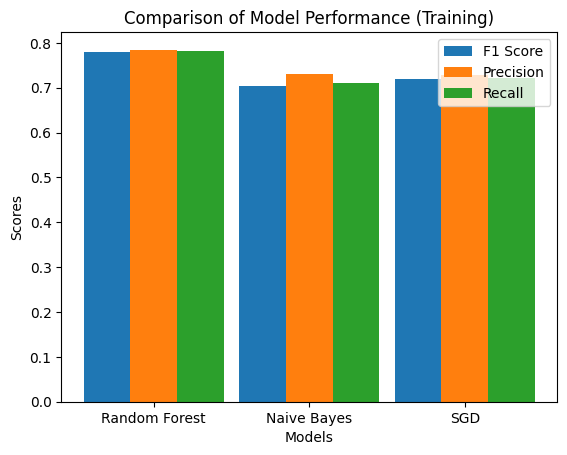

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting scores
models_names = ['Random Forest', 'Naive Bayes', 'SGD']
precision_scores = [score[1] for score in res_precision_recall if score[0] in models_names]
recall_scores = [score[2] for score in res_precision_recall if score[0] in models_names]
F1_scores = [score[3] for score in res_precision_recall if score[0] in models_names]

# Plotting
width = 0.3
x = np.arange(len(models_names))

plt.bar(x - width, F1_scores, width, label='F1 Score')
plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Model Performance (Training)")
plt.xticks(x, models_names)
plt.legend()
plt.show()

Now we will run it on testing data

In [ ]:
# Evaluation on testing data
precision_scores = []
recall_scores = []
F1_scores = []

# Random Forest Evaluation
RF_clf.fit(x_train_scaled, y_train)
RF_y_pred_test = RF_clf.predict(x_test_scaled)

# Calculate precision, recall, and F1 scores
RF_precision_test = precision_score(y_test, RF_y_pred_test, average='weighted', zero_division=1)
RF_recall_test = recall_score(y_test, RF_y_pred_test, average='weighted')
RF_F1_test = f1_score(y_test, RF_y_pred_test, average='weighted')

precision_scores.append(RF_precision_test)
recall_scores.append(RF_recall_test)
F1_scores.append(RF_F1_test)
print("Random Forest Precision Score (Testing): ", RF_precision_test)
print("Random Forest Recall Score (Testing): ", RF_recall_test)
print('Random Forest F1 Score (Testing): ', RF_F1_test)

# Evaluating other models on testing data
for name, model in models:
    model.fit(x_train_scaled, y_train)  # Fit the model with training data
    model_pred_test = model.predict(x_test_scaled)  # Predict on testing data

    # Calculate precision, recall, and F1 scores
    precision_test = precision_score(y_test, model_pred_test, average='weighted', zero_division=1)
    recall_test = recall_score(y_test, model_pred_test, average='weighted')
    F1_test = f1_score(y_test, model_pred_test, average='weighted')

    # Adding scores to the lists
    precision_scores.append(precision_test)
    recall_scores.append(recall_test)
    F1_scores.append(F1_test)

    # Printing scores
    print("")
    print(name, "Precision Score (Testing): ", precision_test)
    print(name, "Recall Score (Testing): ", recall_test)
    print(name, "F1 Score (Testing): ", F1_test)


Random Forest Precision Score (Testing):  0.7932929621468205
Random Forest Recall Score (Testing):  0.7899951076320939
Random Forest F1 Score (Testing):  0.789450647085071

Naive Bayes Precision Score (Testing):  0.7373591356870203
Naive Bayes Recall Score (Testing):  0.7148972602739726
Naive Bayes F1 Score (Testing):  0.7082111513424786

SGD Precision Score (Testing):  0.7356894237052188
SGD Recall Score (Testing):  0.7287181996086106
SGD F1 Score (Testing):  0.7268129617345717


In [ ]:
x_train_scaled.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections
count,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000
mean,-0.049483,-0.053067,0.035613,-0.146657,-0.307801,0.822599,0.166546,2.767548,0.417553,-0.034852,0.044940,-0.106596,0.210115,0.117826
std,0.713682,0.646991,0.589219,0.820943,0.461591,2.415520,0.533790,5.503943,1.036122,0.608459,0.745907,0.424554,0.941120,1.201129
min,-2.229839,-1.541771,-0.833333,-6.219491,-1.000000,-1.212291,-0.407583,-0.002029,-0.703415,-1.275626,-3.019372,-4.000000,-1.795340,-2.500000
25%,-0.528226,-0.521851,-0.500000,-0.551217,-1.000000,-0.270950,-0.344392,-0.002029,-0.227082,-0.521640,-0.516438,0.000000,-0.411704,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.471774,0.478149,0.500000,0.448783,0.000000,0.729050,0.655608,0.997971,0.772918,0.478360,0.483562,0.000000,0.588296,0.500000
max,1.754032,1.028278,1.000000,2.024578,0.000000,25.603352,1.165877,18.279506,5.194727,0.993166,3.179147,1.000000,11.356163,39.750000


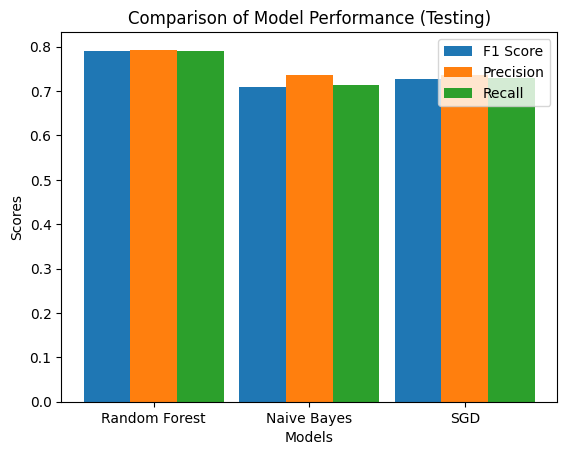

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted width and x values for 3 models
width = 0.3
x = np.arange(3)

# Plotting
plt.bar(x - width, F1_scores, width, label='F1 Score')
plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Model Performance (Testing)")
plt.xticks(x, ['Random Forest', 'Naive Bayes', 'SGD'])
plt.legend()
plt.show()


In [ ]:
import joblib
joblib.dump(RF_clf, 'random_forest.joblib')

['random_forest.joblib']

# Training Model to Predict Popularity

## Split Data


In [ ]:
# df_processed_swapped = df_processed.copy()

# column1 = 'popularity'
# column2 = 'genre'
# colnames = df_processed_swapped.columns.tolist()
# index1, index2 = colnames.index(column1), colnames.index(column2)
# colnames[index2], colnames[index1] = colnames[index1], colnames[index2]
# df_processed_swapped = df_processed_swapped[colnames]
# df_processed_swapped


In [ ]:
# Initializing the StandardScaler
df_processed_swapped = df_processed.copy()

#scaler = MinMaxScaler()

# Assuming you want to scale all numerical columns except the last one, which is ('genre' in this case)
df_to_scale = df_processed_swapped.iloc[:,:-1]

# Selecting only numerical columns for scaling
df_numeric = df_to_scale.select_dtypes(include=[np.number])

# Scale the numerical data
#scaled_array = scaler.fit_transform(df_numeric.values)

# Convert the scaled data back to a DataFrame
#df_processed_swapped = pd.DataFrame(scaled_array, columns=df_numeric.columns)

# Adding the 'genre' column back to the processed DataFrame
df_processed_swapped['genre'] = df['genre']

# Display the first few rows of the processed DataFrame
df_processed_swapped.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,genre,popularity
0,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,3,32.94975,9,edm,1
1,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,4,48.82510,10,pop,0
2,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,4,37.22663,12,pop,0
3,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,4,24.75484,8,pop,0
4,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,4,21.79874,14,r&b,0


In [ ]:
one_hot_encoded = pd.get_dummies(df_processed_swapped['genre'], prefix='one_hot', dtype = int)

# Concatenate the one-hot encoded columns with the original DataFrame
df_processed_swapped = pd.concat([df_processed_swapped, one_hot_encoded], axis=1)

# Drop the original column since it's now encoded
df_processed_swapped.drop('genre', axis=1, inplace=True)
dropped_column = df_processed_swapped.pop('popularity')
df_processed_swapped = pd.concat([df_processed_swapped, dropped_column], axis=1)

df_processed_swapped

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,chorus_hit,sections,one_hot_edm,one_hot_latin,one_hot_pop,one_hot_r&b,one_hot_rap,one_hot_rock,popularity
0,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,...,3,32.94975,9,1,0,0,0,0,0,1
1,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,...,4,48.82510,10,0,0,1,0,0,0,0
2,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,...,4,37.22663,12,0,0,1,0,0,0,0
3,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,...,4,24.75484,8,0,0,1,0,0,0,0
4,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,...,4,21.79874,14,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,...,4,24.30824,7,0,0,0,0,0,1,0
40875,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,...,4,32.53856,8,0,0,1,0,0,0,1
40876,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,...,4,20.73371,7,0,0,1,0,0,0,1
40877,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,...,4,21.65301,14,0,0,1,0,0,0,0


In [ ]:
df_processed_swapped.iloc[:, :-1]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,one_hot_edm,one_hot_latin,one_hot_pop,one_hot_r&b,one_hot_rap,one_hot_rock
0,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,185.655,3,32.94975,9,1,0,0,0,0,0
1,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,101.801,4,48.82510,10,0,0,1,0,0,0
2,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,115.940,4,37.22663,12,0,0,1,0,0,0
3,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,105.592,4,24.75484,8,0,0,1,0,0,0
4,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,114.617,4,21.79874,14,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40874,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,72.272,4,24.30824,7,0,0,0,0,0,1
40875,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,119.985,4,32.53856,8,0,0,1,0,0,0
40876,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,119.999,4,20.73371,7,0,0,1,0,0,0
40877,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,120.030,4,21.65301,14,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import pandas as pd

# The target variable ('y') is the last column, and the rest are feature columns ('X')

X = df_processed_swapped.iloc[:,:-1]  # Features: All columns except the last one
y = df_processed_swapped.iloc[:,-1]   # Target: The last column

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Initialize the RobustScaler
scaler = RobustScaler()

# This avoids data leakage from the test set into the model training process
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

cols = X.columns
x_train_scaled = pd.DataFrame(x_train_scaled, columns=cols)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=cols)

# Display the summary statistics of the scaled training data to check the scaling
x_train_scaled.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,one_hot_edm,one_hot_latin,one_hot_pop,one_hot_r&b,one_hot_rap,one_hot_rock
count,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000,32703.000000
mean,-0.049483,-0.053067,0.035613,-0.146657,-0.307801,0.822599,0.166546,2.767548,0.417553,-0.034852,0.044940,-0.106596,0.210115,0.117826,0.036816,0.069199,0.402715,0.269639,0.057181,0.164450
std,0.713682,0.646991,0.589219,0.820943,0.461591,2.415520,0.533790,5.503943,1.036122,0.608459,0.745907,0.424554,0.941120,1.201129,0.188313,0.253795,0.490452,0.443779,0.232192,0.370689
min,-2.229839,-1.541771,-0.833333,-6.219491,-1.000000,-1.212291,-0.407583,-0.002029,-0.703415,-1.275626,-3.019372,-4.000000,-1.795340,-2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.528226,-0.521851,-0.500000,-0.551217,-1.000000,-0.270950,-0.344392,-0.002029,-0.227082,-0.521640,-0.516438,0.000000,-0.411704,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.471774,0.478149,0.500000,0.448783,0.000000,0.729050,0.655608,0.997971,0.772918,0.478360,0.483562,0.000000,0.588296,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.754032,1.028278,1.000000,2.024578,0.000000,25.603352,1.165877,18.279506,5.194727,0.993166,3.179147,1.000000,11.356163,39.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
joblib.dump(scaler, "popularity_scaler.joblib")

['popularity_scaler.joblib']

In [ ]:
x_test_scaled.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,one_hot_edm,one_hot_latin,one_hot_pop,one_hot_r&b,one_hot_rap,one_hot_rock
count,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000,8176.000000
mean,-0.064606,-0.051328,0.033288,-0.147096,-0.299902,0.824712,0.174113,2.947333,0.413020,-0.050746,0.042663,-0.105308,0.222508,0.112341,0.036448,0.071551,0.397750,0.263087,0.058831,0.172334
std,0.725303,0.654800,0.589190,0.840225,0.458243,2.348634,0.539722,5.656416,1.034609,0.608079,0.751137,0.417409,0.990845,1.274566,0.187414,0.257759,0.489463,0.440336,0.235322,0.377693
min,-1.997581,-1.540599,-0.833333,-5.274481,-1.000000,-0.575419,-0.407583,-0.002029,-0.713002,-1.275626,-2.198082,-3.000000,-1.795340,-2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.552419,-0.532134,-0.500000,-0.544295,-1.000000,-0.268156,-0.346288,-0.002029,-0.227082,-0.529043,-0.528461,0.000000,-0.416052,-0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.016129,0.007712,0.000000,0.016100,0.000000,-0.001397,0.012638,0.000402,-0.005992,-0.009112,-0.008344,0.000000,-0.000553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.459677,0.488432,0.500000,0.453955,0.000000,0.766061,0.669826,1.542761,0.772918,0.455581,0.490654,0.000000,0.589209,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.725806,1.028278,1.000000,1.578751,0.000000,25.296089,1.165877,18.261225,5.152786,0.968109,3.168517,1.000000,19.897959,33.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings

# Preparing models for comparison
sgd_rgr = SGDRegressor(loss='log_loss', max_iter=5000, shuffle=True)
models = [
    ['SGD', sgd_rgr]
]

# Random Forest model setup
RF_rgr = RandomForestRegressor(random_state=42, min_samples_split=5, min_samples_leaf = 2)

# Initialize KFold for cross-validation
kfold = KFold(n_splits=5, random_state=13, shuffle=True)

# Evaluate Random Forest and other models
results = []
print("Evaluating Random Forest:")
RF_cross_val_score = cross_val_score(RF_rgr, x_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')
results.append(('Random Forest', RF_cross_val_score))
print("CrossVal Score Mean: ", RF_cross_val_score.mean())
print("CrossVal Score Std: ", RF_cross_val_score.std())



Evaluating Random Forest:
CrossVal Score Mean:  -0.15486069691107923
CrossVal Score Std:  0.0019868345131197865


In [ ]:
from sklearn.linear_model import SGDClassifier, SGDRegressor
import sklearn

# Preparing models for comparison
sgd_rgr = SGDRegressor(loss='squared_error', max_iter=5000, shuffle=True)
models = [
    ['SGD', sgd_rgr]
]
print(sklearn.metrics.get_scorer_names())
# Evaluate other models
for name, model in models:
    cv_score = cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    results.append((name, cv_score))
    print(f"\n{name} ->")
    print("CrossVal Score Mean: ", cv_score.mean())
    print("CrossVal Score Std: ", cv_score.std())


['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc',

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import warnings

# Preparing models for comparison
sgd_clf = OneVsOneClassifier(SGDClassifier(loss='log_loss', max_iter=5000, shuffle=True))
models = [
    ['Naive Bayes', GaussianNB()],
    ['SGD', sgd_clf]
]

# Random Forest model setup
RF_clf = RandomForestClassifier(random_state=42, min_samples_split=5)

# Initialize StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=10, random_state=13, shuffle=True)

# Evaluate Random Forest and other models
results = []
print("Evaluating Random Forest:")
RF_cross_val_score = cross_val_score(RF_clf, x_train_scaled, y_train, cv=kfold, scoring='accuracy')
results.append(('Random Forest', RF_cross_val_score))
print("CrossVal Score Mean: ", RF_cross_val_score.mean())
print("CrossVal Score Std: ", RF_cross_val_score.std())

# Evaluate other models
for name, model in models:
    cv_score = cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append((name, cv_score))
    print(f"\n{name} ->")
    print("CrossVal Score Mean: ", cv_score.mean())
    print("CrossVal Score Std: ", cv_score.std())


Evaluating Random Forest:
CrossVal Score Mean:  0.7800203437305129
CrossVal Score Std:  0.006755499550565547

Naive Bayes ->
CrossVal Score Mean:  0.7152865184453875
CrossVal Score Std:  0.008351606688239352

SGD ->
CrossVal Score Mean:  0.7299642114887852
CrossVal Score Std:  0.010151994765065085


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

res_precision_recall = []

# Random Forest Evaluation
y_pred_RF = cross_val_predict(RF_clf, x_train_scaled, y_train, cv=10)
RF_precision = precision_score(y_train, y_pred_RF, average="weighted")
RF_recall = recall_score(y_train, y_pred_RF, average="weighted")
RF_F1 = f1_score(y_train, y_pred_RF, average="weighted")
res_precision_recall += [['Random Forest', RF_precision, RF_recall, RF_F1]]
print('%s -> %s: %f     %s: %f    %s: %f' % ('Random Forest', 'Precision Score', RF_precision, 'Recall Score', RF_recall, 'F1 Score', RF_F1))

# Evaluating other models
for name, model in models:
    y_pred = cross_val_predict(model, x_train_scaled, y_train, cv=kfold)
    precision = precision_score(y_train, y_pred, average="weighted")
    recall = recall_score(y_train, y_pred, average="weighted")
    model_f1_score = f1_score(y_train, y_pred, average="weighted")
    res_precision_recall += [[name, precision, recall, model_f1_score]]
    print('%s -> %s: %f     %s: %f    %s: %f' % (name, 'Precision Score', precision, 'Recall Score', recall, 'F1 Score', model_f1_score))


Random Forest -> Precision Score: 0.783055     Recall Score: 0.779623    F1 Score: 0.778824
Naive Bayes -> Precision Score: 0.732033     Recall Score: 0.715286    F1 Score: 0.709587
SGD -> Precision Score: 0.729785     Recall Score: 0.725866    F1 Score: 0.724472


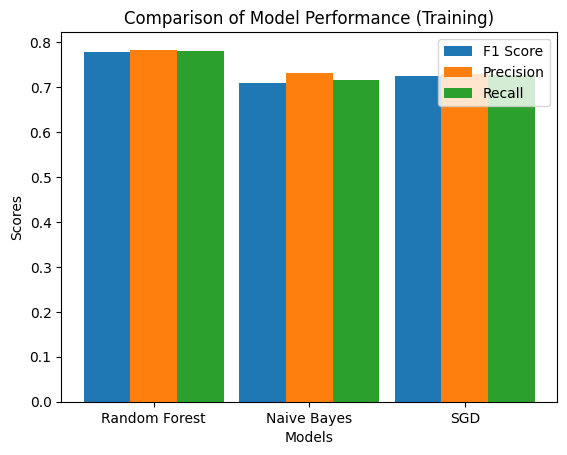

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extracting scores
models_names = ['Random Forest', 'Naive Bayes', 'SGD']
precision_scores = [score[1] for score in res_precision_recall if score[0] in models_names]
recall_scores = [score[2] for score in res_precision_recall if score[0] in models_names]
F1_scores = [score[3] for score in res_precision_recall if score[0] in models_names]

# Plotting
width = 0.3
x = np.arange(len(models_names))

plt.bar(x - width, F1_scores, width, label='F1 Score')
plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Model Performance (Training)")
plt.xticks(x, models_names)
plt.legend()
plt.show()

In [ ]:
# Evaluation on testing data
precision_scores = []
recall_scores = []
F1_scores = []

# Random Forest Evaluation
RF_clf.fit(x_train_scaled, y_train)
RF_y_pred_test = RF_clf.predict(x_test_scaled)

# Calculate precision, recall, and F1 scores
RF_precision_test = precision_score(y_test, RF_y_pred_test, average='weighted', zero_division=1)
RF_recall_test = recall_score(y_test, RF_y_pred_test, average='weighted')
RF_F1_test = f1_score(y_test, RF_y_pred_test, average='weighted')

precision_scores.append(RF_precision_test)
recall_scores.append(RF_recall_test)
F1_scores.append(RF_F1_test)
print("Random Forest Precision Score (Testing): ", RF_precision_test)
print("Random Forest Recall Score (Testing): ", RF_recall_test)
print('Random Forest F1 Score (Testing): ', RF_F1_test)

# Evaluating other models on testing data
for name, model in models:
    model.fit(x_train_scaled, y_train)  # Fit the model with training data
    model_pred_test = model.predict(x_test_scaled)  # Predict on testing data

    # Calculate precision, recall, and F1 scores
    precision_test = precision_score(y_test, model_pred_test, average='weighted', zero_division=1)
    recall_test = recall_score(y_test, model_pred_test, average='weighted')
    F1_test = f1_score(y_test, model_pred_test, average='weighted')

    # Adding scores to the lists
    precision_scores.append(precision_test)
    recall_scores.append(recall_test)
    F1_scores.append(F1_test)

    # Printing scores
    print("")
    print(name, "Precision Score (Testing): ", precision_test)
    print(name, "Recall Score (Testing): ", recall_test)
    print(name, "F1 Score (Testing): ", F1_test)


Random Forest Precision Score (Testing):  0.7922518066480019
Random Forest Recall Score (Testing):  0.789261252446184
Random Forest F1 Score (Testing):  0.7887663281501601

Naive Bayes Precision Score (Testing):  0.7384756815958545
Naive Bayes Recall Score (Testing):  0.7205234833659491
Naive Bayes F1 Score (Testing):  0.7153552726484219

SGD Precision Score (Testing):  0.7316597199616399
SGD Recall Score (Testing):  0.7298189823874756
SGD F1 Score (Testing):  0.7293405928617765


In [ ]:
joblib.dump(RF_clf, "popularity_random_forest.joblib")

['popularity_random_forest.joblib']

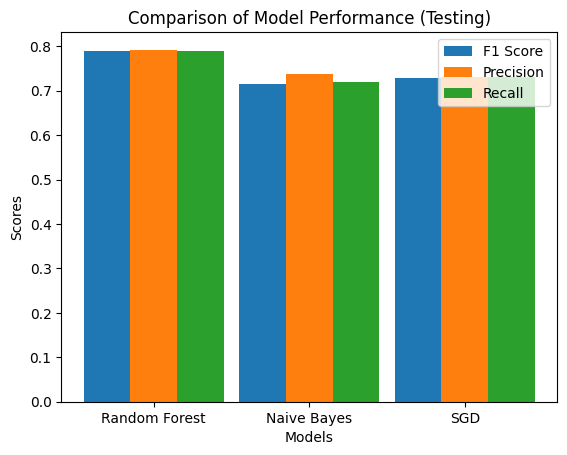

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted width and x values for 3 models
width = 0.3
x = np.arange(3)

# Plotting
plt.bar(x - width, F1_scores, width, label='F1 Score')
plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Model Performance (Testing)")
plt.xticks(x, ['Random Forest', 'Naive Bayes', 'SGD'])
plt.legend()
plt.show()


In [ ]:
!pip install dash
!pip install dash-bootstrap-components
!pip install jupyter-dash
!pip install pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.7 MB/s eta 0:00:00


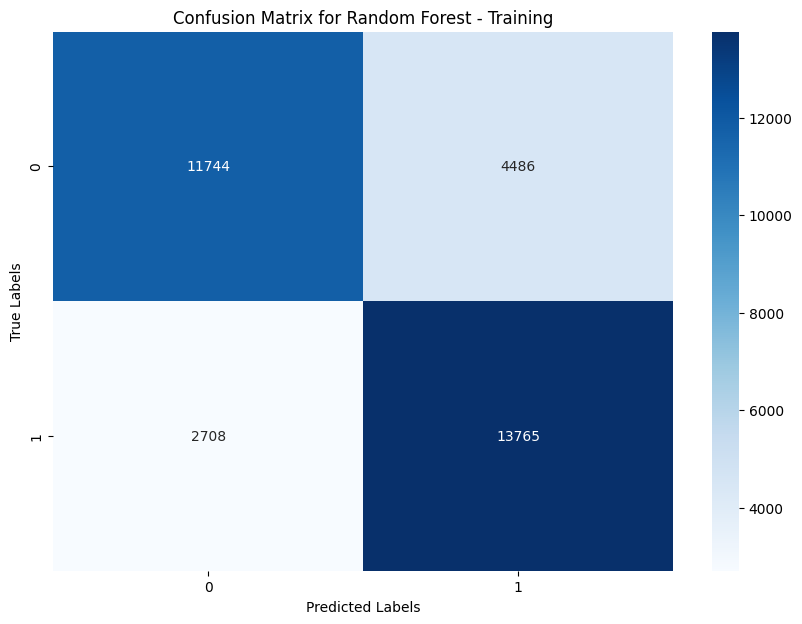

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Random Forest on training data
y_pred_RF_train = cross_val_predict(RF_clf, x_train_scaled, y_train, cv=kfold)
cm_rf_train = confusion_matrix(y_train, y_pred_RF_train)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_train, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest - Training')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

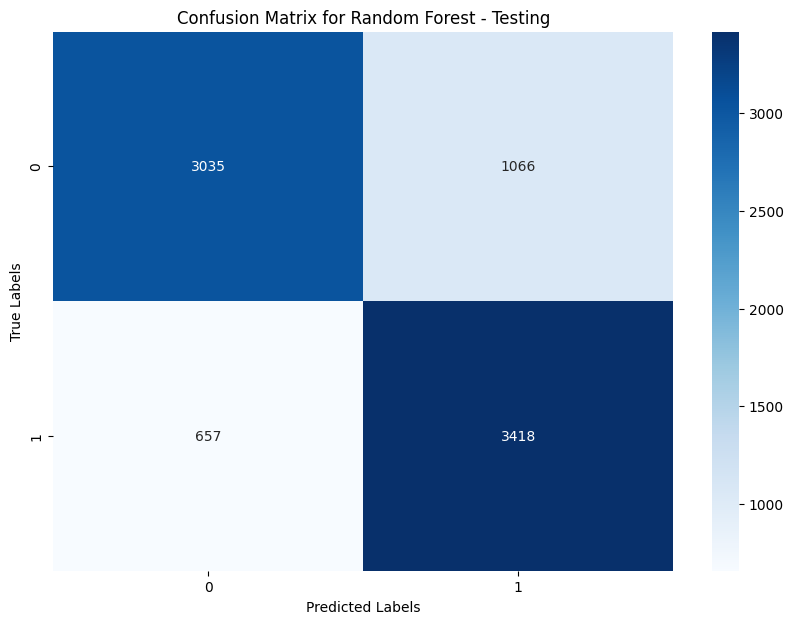

In [ ]:
# Random Forest on testing data
RF_y_pred_test = RF_clf.predict(x_test_scaled)
cm_rf_test = confusion_matrix(y_test, RF_y_pred_test)

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest - Testing')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()